In [1]:
import os
import sys
import warnings
import importlib
import platform
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import pprint

cwd = Path(os.getcwd())
# Assuming your notebook is in the project root, set the project root as cwd
project_root = cwd.parent
print(project_root)
# project_root = cwd.parent.parent  # Go up two directory levels
# Add the project root directory to sys.path
sys.path.insert(0, str(project_root))
# sys.path.append('../')

import corr_fitter.bs_utils as bs
import corr_fitter.bs_analysis as bs_analysis
import corr_fitter.load_data_priors as ld
import corr_fitter.corr_fit_analysis as fa

warnings.simplefilter(action="default")
warnings.filterwarnings('ignore')


/home/gmoney/lqcd/corr_fitter


In [2]:
with open('bootstrap_results.p', 'rb') as f:
    results = pickle.load(f)
with open('bs_results.p', 'rb') as f:
    results_gb = pickle.load(f)
pprint.pprint(results)
pprint.pprint(results_gb)


{'proton': {'E0': array([0.71389587, 0.71929011, 0.71835268, ..., 0.71001303, 0.7059282 ,
       0.71259156]),
            'wf_(P,S)': array([[1.00844991e-05],
       [1.08586970e-05],
       [1.08412929e-05],
       ...,
       [9.78038941e-06],
       [8.95691886e-06],
       [9.87458344e-06]]),
            'wf_(S,S)': array([[2.61645079e-06],
       [2.80453611e-06],
       [2.80182526e-06],
       ...,
       [2.55234869e-06],
       [2.34077547e-06],
       [2.56439931e-06]])}}
{'data': {'proton_E0': [0.6816869549583681,
                        0.703790861150062,
                        0.7098152316554028,
                        0.6794271940148391,
                        0.6863766358242822,
                        0.6992472983910811,
                        0.6910034018967095,
                        0.6718578322057797,
                        0.6844209887968169,
                        0.6749089213426315,
                        0.6870009435046116,
                        0.689

In [3]:
# Define paths and other variables
if platform.system() == 'Darwin':
    base_dir = '/Users/grantdb/lqcd/corr_fitter'
else:
    base_dir = '/home/gmoney/lqcd/corr_fitter'
input_dir = os.path.join(base_dir, "tests/input_files")
data_dir = os.path.join(base_dir, "data")
fit_results_dir = os.path.join(base_dir, "fit_results")
if platform.system() == 'Darwin':
    data_file = '/Users/grantdb/lqcd/data/c51_2pt_octet_decuplet.h5'
else:
    data_file = '/home/gmoney/lqcd/data/c51_2pt_octet_decuplet.h5'
# hyperon_data_file = os.path.join(data_dir,"hyperon_data.h5")
bs_data_file = os.path.join(data_dir, "hyperon_bs_data.h5")

N_states: 1
Baryon: proton
t_range: [12, 19]
Least Square Fit:
  chi2/dof [dof] = 1.2 [14]    Q = 0.29    logGBF = 360.43

Parameters:
   proton_z_PS 0    0.00001060 (36)        [  0.0(3.3)e-05 ]  
               1   6e-21 +- 3.3e-05        [  0.0(3.3)e-05 ]  
               2   4e-82 +- 3.3e-06        [  0.0(3.3)e-06 ]  
               3   4e-82 +- 3.3e-06        [  0.0(3.3)e-06 ]  
   proton_z_SS 0      2.727(90)e-06        [ 0.000044 (44) ]  
               1      0.000044 (44)        [ 0.000044 (44) ]  
               2      0.000044 (44)        [ 0.000044 (44) ]  
               3      0.000044 (44)        [ 0.000044 (44) ]  
       proton_E0        0.7178 (31)        [     0.68 (25) ]  
proton_log(dE) 0            -2 (10)        [       -2 (10) ]  
               1            -2 (22)        [       -2 (22) ]  
               2            -2 (22)        [       -2 (22) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 13/0.0)



{
    'proton_SS':
 

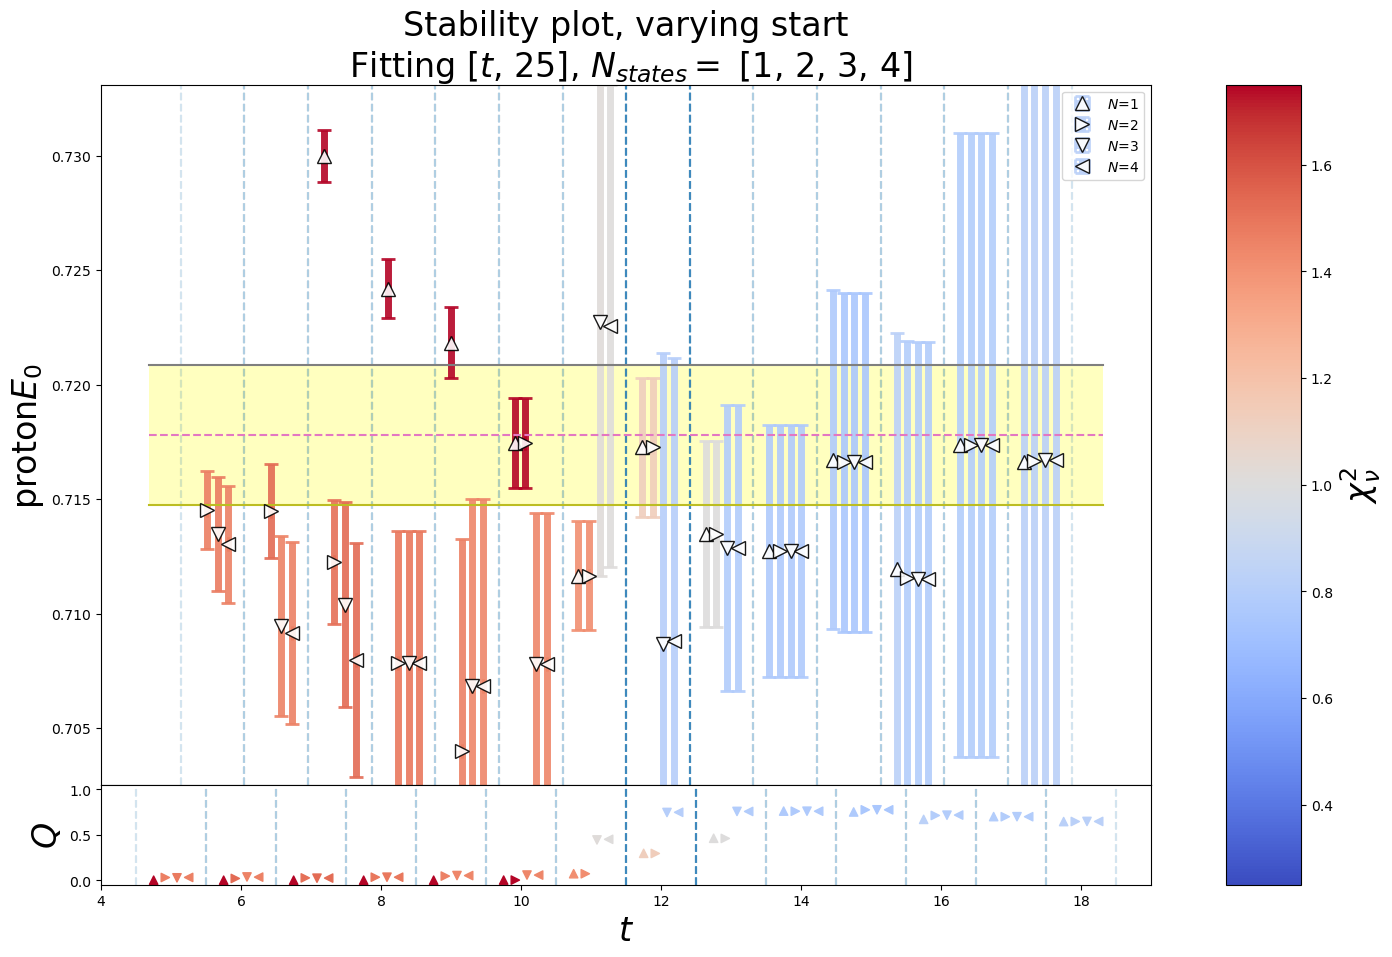

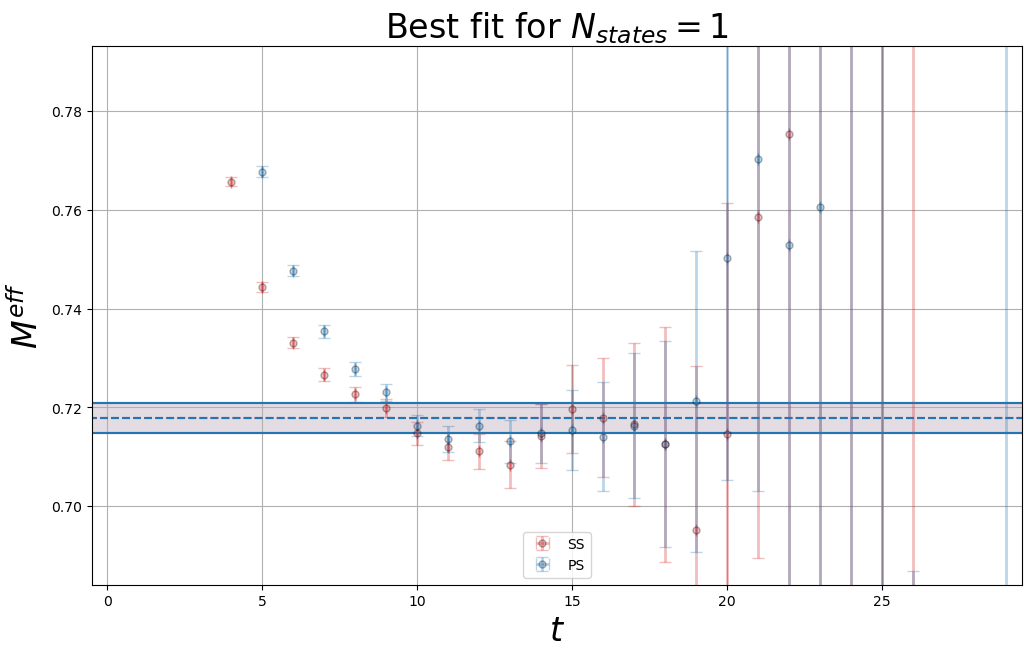

0.7178(31)


In [4]:
importlib.reload(fa)
import gvar as gv
# importlib.reload(fitter)
abbr = 'a12m400'
# pprint.pprint(gv.dataset.avg_data(raw))
# fa.perform_fit_analysis(input_dir,data_file,abbr,all=False,baryon='sigma_p')
fa.perform_fit_analysis(input_dir,data_file,abbr,all=True,show_plots=True,baryon='proton',
                     bs=False,bs_N=1000,seed='a12m400')